# Face Generator and Validator
*Main application for the final project*

## Components
1. Get user input for type of expression
    - User can input emotions listed below: 
      angry, disgust, fear, happy, neutral, sad, surprise
2. The correct gan model will be loaded
3. An image is generated matching the emotion that the user requested for. 
4. The classifier model is then loaded
5. The classifier will evaluate the image and validate the image


In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import array_to_img
from keras.models import load_model
from numpy.random import randn
from matplotlib import pyplot
import cv2
import numpy as np

In [2]:
classes = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
assert not faceCascade.empty()
faceCascade.empty()

False

In [3]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
    # generate points in the latent space
    x_input = randn(latent_dim * n_samples)
    # reshape into a batch of inputs for the network
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input

In [4]:
# plot the generated images
def create_plot(examples, n):
    # plot images
    for i in range(n * n):
        # define subplot
        pyplot.subplot(n, n, 1 + i)
        # turn off axis
        pyplot.axis('off')
        # plot raw pixel data
        pyplot.imshow(examples[i, :, :])
    pyplot.show()

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def plot_image_grid(images, images_file_names, predictions_list, ncols=None, cmap='gray'):
    '''Plot a grid of images'''
    if not ncols:
        factors = [i for i in range(1, len(images)+1) if len(images) % i == 0]
        ncols = factors[len(factors) // 2] if len(factors) else len(images) // 4 + 1
    nrows = int(len(images) / ncols) + int(len(images) % ncols)
    imgs = [images[i] if len(images) > i else None for i in range(nrows * ncols)]
    f, axes = plt.subplots(nrows, ncols, figsize=(3*ncols, 2*nrows))
    axes = axes.flatten()[:len(imgs)]
    for img, f_name, label, ax in zip(imgs, images_file_names, predictions_list, axes.flatten()): 
        if np.any(img):
            if len(img.shape) > 2 and img.shape[2] == 1:
                img = img.squeeze()
            ax.set_title(label, color='blue')
            ax.imshow(img, cmap=cmap)

In [12]:
validator_model = tf.keras.models.load_model('final_gen_trained_cross_model.h5')

# EmoGen - GAN-based Emotion Generation and Classifier Validation

In [24]:
print("angry, disgust, fear, happy, neutral, sad, surprise")
emotion_to_gen = input("Enter the emotion from the list above: ")
num_image = input("Enter number of images:")
print("FGV will generate " + str(num_image) + " images with " + emotion_to_gen + " emotion.")

angry, disgust, fear, happy, neutral, sad, surprise
Enter the emotion from the list above: fear
Enter number of images:4
FGV will generate 4 images with fear emotion.


4/4 [==============================] - 1s 143ms/step


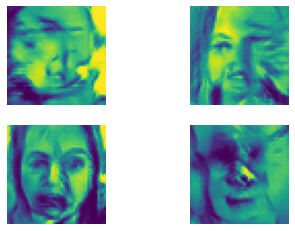

In [25]:
if True:
    # load model
    #model = tf.keras.models.load_model(os.path.join('good_gen_model', f'{val}'_generator_model.h5'))
    num_image = int(num_image)
    model = tf.keras.models.load_model('good_gen_model/' + emotion_to_gen + '_generator_model.h5')
    # generate images
    latent_points = generate_latent_points(100, 100)
    # generate images
    X = model.predict(latent_points)
    # scale from [-1,1] to [0,1]
    X = (X + 1) / 2.0
    # plot the result
    create_plot(X, 2)
    for i in range(num_image):
        img = array_to_img(X[i])
        img.save(os.path.join('generated_images', f'{emotion_to_gen}_generated_img_{i}.png'))

1/1 [==============================] - 0s 87ms/step


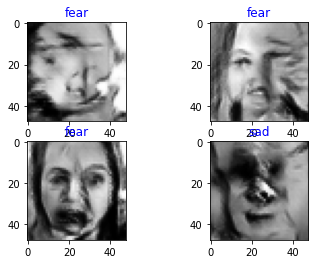

In [26]:
images_list = []
images_file_names = []
predictions_list = []
for i in range(num_image):
    img_to_classify = cv2.imread(os.path.join('generated_images', f'{emotion_to_gen}_generated_img_{i}.png'))
    images_list.append(img_to_classify)
    images_file_names.append(os.path.basename(os.path.join('generated_images', f'{emotion_to_gen}_generated_img_{i}.png')))
    img_to_classify = cv2.resize(img_to_classify, (224, 224))
    img_to_classify = np.expand_dims(img_to_classify, axis=0)
    img_to_classify = img_to_classify/255.0
    predictions = validator_model.predict(img_to_classify)
    predictions_list.append(classes[np.argmax(predictions[0])])
plot_image_grid(images_list, images_file_names, predictions_list)